# Lab Assignment 2 - Anastasia Jeffcoat

## 200003415

##### https://github.com/ajeffcoat216/PY4SA23_Assignment.git

### If...else statements

#### Question 1
##### Is a number divisible by 3?

In [35]:
x = 873
if x%3 == 0 :
    print(str(x) + " is divisible by 3.")
else: 
    print(str(x) + " is not divisible by 3.")
    
y = 659
if y%3 == 0:
    print(str(y) + " is divisible by 3.")
else:
    print(str(y) + " is not divisible by 3.")

873 is divisible by 3.
659 is not divisible by 3.


#### Question 2
##### Is a fruit acceptable?

In [36]:
fruits = ["apple", "orange", "pear", "kiwi", "strawberry"]
if 'apple' in fruits:
    print("Apple is acceptable.")
else:
    print("Apple is not acceptable.")
if 'banana' in fruits:
    print("Banana is accetable.")
else:
    print("Banana is not accetable.")

Apple is acceptable.
Banana is not accetable.


#### Question 3
##### How far apart are two co-ordinates?

In [37]:
from haversine import haversine, Unit
#my home town to St. Andrews
#lat, long
#answer will be in km
bedworth = (52.4814, 1.4689)
standrews = (56.3398, 2.7967)
haversine(bedworth, standrews)

437.5327443711939

### Pandas and NumPy

In [38]:
import numpy as np
import pandas as pd
ppt = pd.read_csv("portland_park_trees.csv", sep=",", header=0, encoding="ISO-8859-1")

In [39]:
#how many data points are we working with?
print(len(ppt))

25534


#### Question 1
##### How many trees are of the Quercus or Acer genus?

In [40]:
qanda = ppt[(ppt["Genus"]=="Quercus") + (ppt["Genus"]=="Acer")]
print(len(qanda))

5675


#### Question 2
##### How many trees are of the Quercus or Acer genus, and have a DBH larger than 50 inches?

In [41]:
qadbh50 = ppt[(ppt["Genus"]=="Quercus") + (ppt["Genus"]=="Acer") & (ppt["DBH"]>50)]
print(len(qadbh50))

124


#### Question 3
##### Which genus has the highest mean DBH of the following genera: Quercus, Acer or Fraxinus?

In [42]:
quercus = ppt[ppt["Genus"]=="Quercus"]
acer = ppt[ppt["Genus"]=="Acer"]
fraxinus = ppt[ppt["Genus"]=="Fraxinus"]
quercusdbhm = quercus["DBH"].mean()
acerdbhm = acer["DBH"].mean()
fraxinusdbhm = fraxinus["DBH"].mean()
if quercusdbhm > acerdbhm and quercusdbhm > fraxinusdbhm:
    print (str("The genus Quercus has the highest mean DBH."))
elif acerdbhm > quercusdbhm and fraxinusdbhm:
    print(str("The genus Acer has the highest mean DBH."))
else:
    print (str("The genus Fraxinus has the highest mean DBH."))

print(f"The Quercus DBH is: {quercusdbhm}")
print(f"The Acer DBH is: {acerdbhm}")
print(f"The Fraxinus DBH is: {fraxinusdbhm}")



The genus Quercus has the highest mean DBH.
The Quercus DBH is: 23.56823839157492
The Acer DBH is: 18.419085331846066
The Fraxinus DBH is: 11.033609693877551


#### Question 4
##### How many different species of trees are recorded in the Acer genus?

In [43]:
acercount = acer["Species"].count()
acer.groupby("Species")["Genus"].count()
acerspecies = pd.DataFrame()
acerspecies["Count"] = acer.groupby("Species")['Genus'].count()
rows_count = len(acerspecies.index)
print (f"The Acer genus has {rows_count} different species.")

The Acer genus has 20 different species.


In [44]:
wc = pd.read_csv("world_cities.csv", sep=",", header=0, encoding="ISO-8859-1")
wc.columns =[column.replace(" ", "_") for column in wc.columns]
wc["pop_m"] = wc["pop"] / 1000000
del wc['pop']
wc.head()

,city,country,lat,lon,capital,pop_m
0,'Abasan al-Jadidah,Palestine,31.31,34.34,0,0.005629
1,'Abasan al-Kabirah,Palestine,31.32,34.35,0,0.018999
2,'Abdul Hakim,Pakistan,30.55,72.11,0,0.047788
3,'Abdullah-as-Salam,Kuwait,29.36,47.98,0,0.021817
4,'Abud,Palestine,32.03,35.07,0,0.002456


#### Question 5

In this first cell I import the .csv file and create a new column for population, in the millions. I then delete the original column for population.


Now I will subset the world cities according to 'A Coruna', the first city that starts with 'A', like my first name, 'Anastasia'>

In [45]:
acities = wc[wc['city'].str.startswith('A')]
print (acities)

                      city   country    lat     lon  capital     pop_m
127               A Coruna     Spain  43.33   -8.42        0  0.243088
128              A Estrada     Spain  42.70   -8.50        0  0.021997
129              A Laracha     Spain  43.25   -8.59        0  0.010856
130   A Pobra do Caraminal     Spain  42.61   -8.94        0  0.009955
131            A Ver-o-Mar  Portugal  41.40   -8.76        0  0.010971
...                    ...       ...    ...     ...      ...       ...
2628                 Azuma     Japan  36.34  139.24        0  0.023382
2629   Azuqueca de Henares     Spain  40.57   -3.27        0  0.024880
2630                  Azur    Israel  32.02   34.80        0  0.010224
2631                 Azusa       USA  34.14 -117.91        0  0.048992
2632         Azzano Decimo     Italy  45.89   12.72        0  0.014072

[2506 rows x 6 columns]


Now I will create a list of the 5 most populous cities in Spain, where 'A Coruna' is located.

In [46]:
import numpy as np
import pandas as pd
spanishcities = wc[wc["country"]=="Spain"]
spanishcities.nlargest(5,'pop_m')

,city,country,lat,lon,capital,pop_m
22032,Madrid,Spain,40.42,-3.71,1,3.146804
3385,Barcelona,Spain,41.40,2.17,0,1.591485
39931,Valencia,Spain,39.48,-0.39,0,0.803438
34629,Sevilla,Spain,37.40,-5.98,0,0.702516
42691,Zaragoza,Spain,41.65,-0.89,0,0.658186


### Python Data Visualization

#### Graph 1.
##### Scatterplot for the genus 'Ulmus' according to DBH and Tree Height

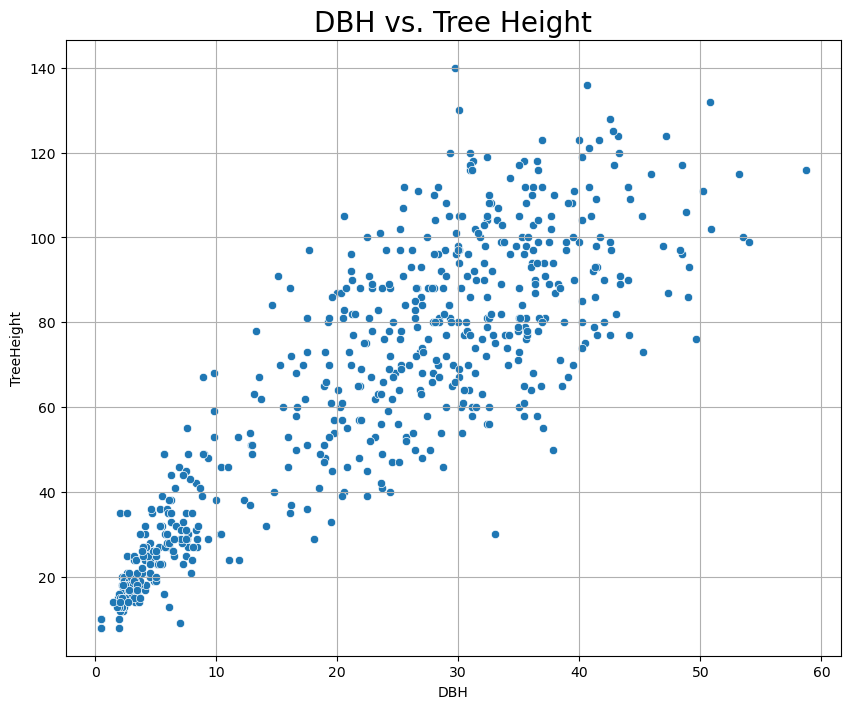

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#I have uploaded portland_park_trees previously but want a new code for the data
ptrees = pd.read_csv("portland_park_trees.csv", header=0)
ulmus = ptrees[ptrees["Genus"]=="Ulmus"]
fig, axs = plt.subplots(1, 1)
sns.scatterplot(ax=axs, x="DBH", y="TreeHeight", data=ulmus)
axs.set_title("DBH vs. Tree Height", fontsize=20, color="#000000")
axs.grid(True)
plt.show(fig)

#### Graph 2.
##### Scatterplot for the genus 'Ulmus' according to DBH and 'Tree Height', coloured according to species of 'Ulmus'

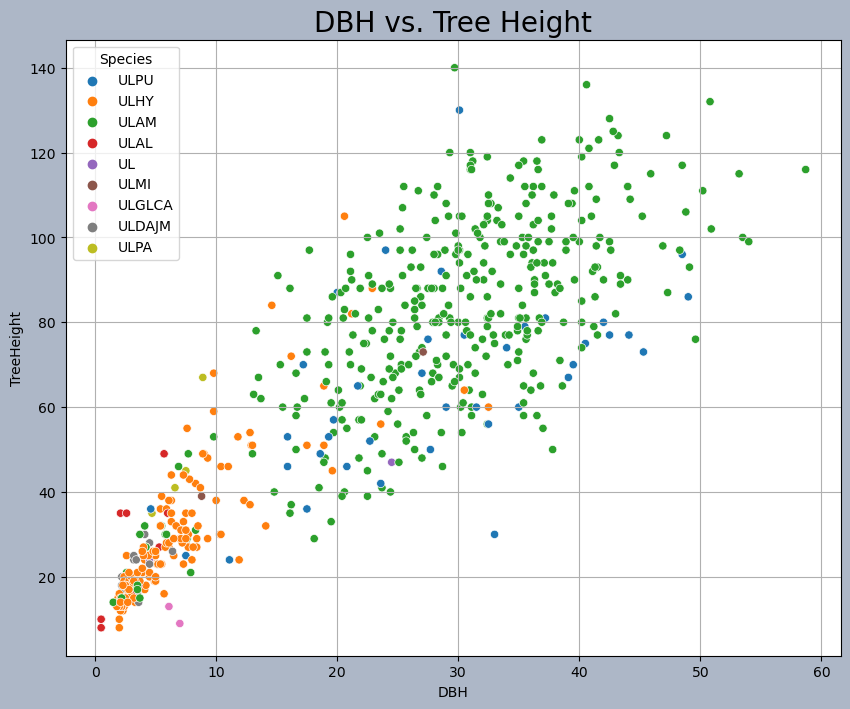

In [136]:
fig, axs = plt.subplots(1, 1)
sns.scatterplot(ax=axs, x="DBH", y="TreeHeight", hue='Species', data=ulmus)
axs.set_title("DBH vs. Tree Height", fontsize=20, color="#000000")
handles, labels = axs.get_legend_handles_labels()
axs.grid(True)
fig.patch.set_facecolor('#adb7c7')
plt.show(fig)

#### Graph 3.
##### A series of boxplots for the genus 'Ulmus', each boxplot shows a different species.

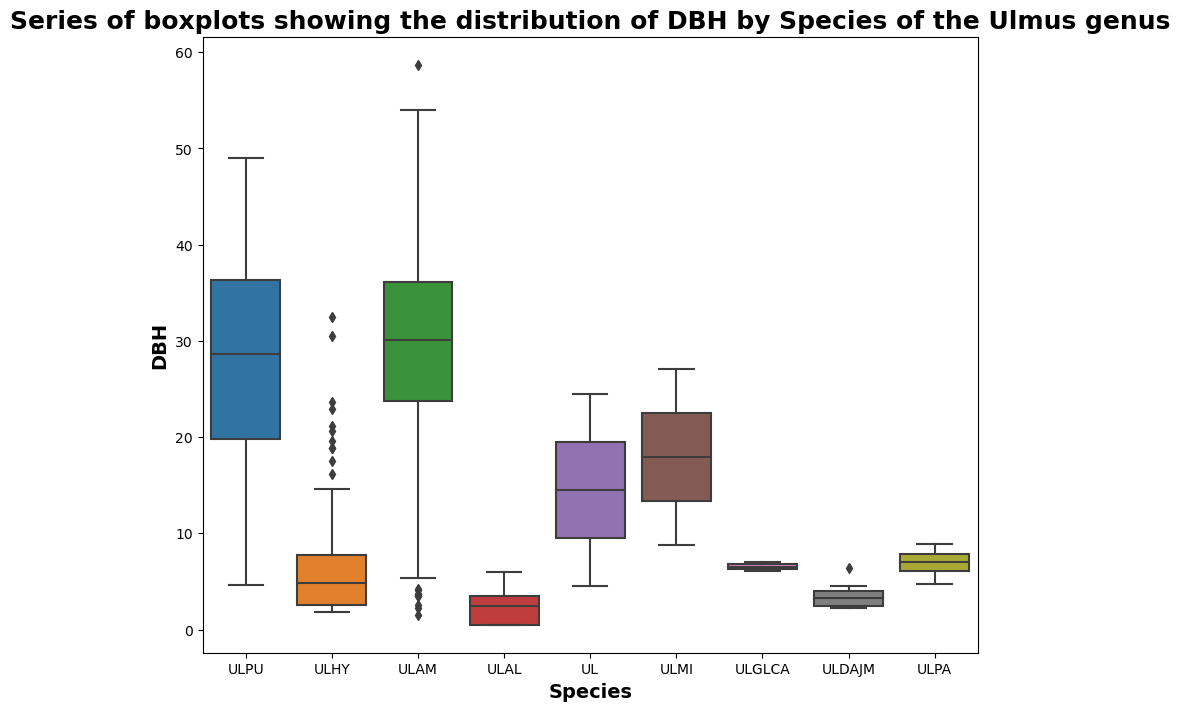

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
ptrees = pd.read_csv("portland_park_trees.csv", header=0)
ulmus = ptrees[ptrees["Genus"]=="Ulmus"]
ulspdbh = sns.boxplot( x=ulmus['Species'], y=ulmus['DBH'])
ulspdbh.set_xlabel('Species', fontsize= 14, fontweight='bold')
ulspdbh.set_ylabel('DBH', fontsize= 14, fontweight='bold')
ulspdbh.set_title('Series of boxplots showing the distribution of DBH by Species of the Ulmus genus', fontsize= 18, fontweight='bold');


#### Graph 4.
##### Combining Graphs 1 and 3 into a single figure.

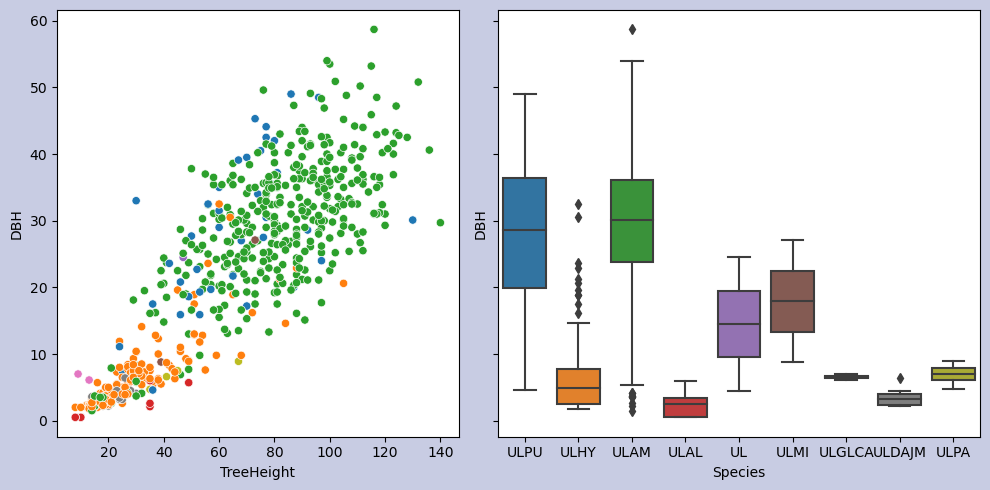

In [120]:
f, axs = plt.subplots(1,2, figsize=(10,5),sharey=True,gridspec_kw=dict(width_ratios=[10,12]))
sns.scatterplot(data= ulmus, x="TreeHeight", y="DBH", hue="Species", ax=axs[0], legend=0)
sns.boxplot(data=ulmus, x = "Species", y="DBH", ax=axs[1])
f.tight_layout()
f.patch.set_facecolor('#c8cce3')
f.legend=False



### Python Geopandas

##### T1. 
Read the shapefile of Tree Preservation Orders of the Perth and Kinross Council through using geopandas:

<AxesSubplot: >

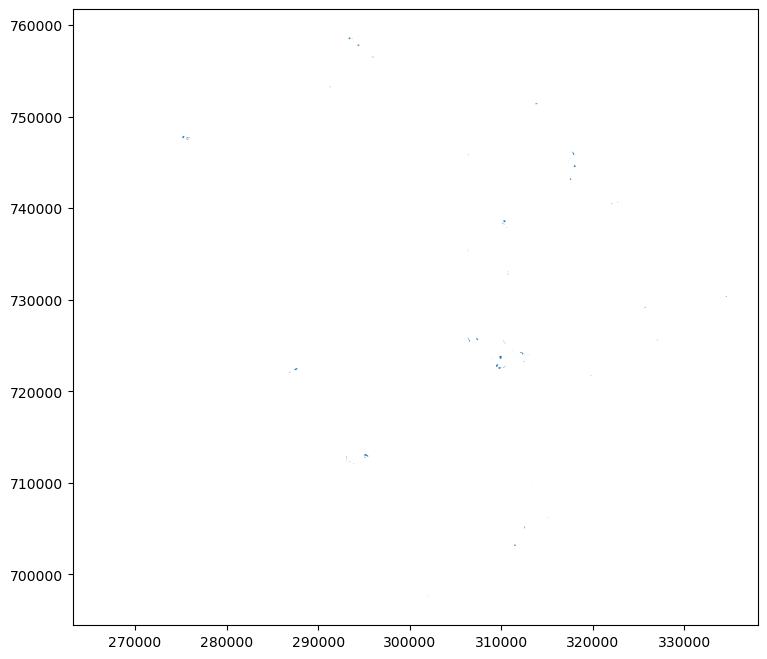

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot
plt.rcParams['figure.figsize'] = [10, 8]

TreesPKC = gpd.read_file('Tree_Preservation_Order.shp')
TreesPKC.plot()

This plot of the Tree Preservation Orders is unclear and confusing as to what is being shown. I will use '.explore()' to visualise better this shapefile.

In [132]:
TreesPKC.explore()

##### T2. 
Plot the first and final 5 sets of records from the SG_UrbanRural_2020 shapefile.

Note: these data points are difficult to see on the .explore() maps, they are in bright blue but very small in size.

In [19]:
gpd.read_file('Tree_Preservation_Order.shp')
TreesPKC5 = TreesPKC.nlargest(5, 'MI_PRINX')
TreesPKC05 = TreesPKC.nsmallest(5, 'MI_PRINX')
TreesPKC5.explore(column='TOWN')

In [18]:
TreesPKC05.explore(column='TOWN')

##### T4. 
The co-ordinate system for this shapefile is:
EPSG:27700 / British National Grid (EPSG:27700).
This was obtained by the https://www.spatialdata.gov.scot website, but also from this code:

In [21]:
TreesPKC.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

##### T5.
This dataset contains 15 features, or columns, which were obtained by this code:

In [22]:
len(TreesPKC.columns)

15

This dataset also has 88 data points, obtained by this code:

In [27]:
len(TreesPKC)

88

##### T6 & T8.
Now I am creating and plotting a new geopandas dataframe to see all the trees with a preservation order in the town of Auchterarder. The legend shows the code names for each tree, coloured to show where they are around the town of Auchterarder.

In [127]:
Atrees = TreesPKC[TreesPKC["TOWN"]=="Auchterarder"]
Atrees.explore(column='NEW__ID', legend=True, cmap='gist_rainbow')

##### T7 & T8
Now I am creating and plotting a new Geopandas dataframe using a numerical attribute - perimeter. The map below shows the trees with a preservation order that have a perimeter of more than 400cm.

In [128]:
Peritrees = TreesPKC[(TreesPKC["PERIMETER"]>400)]
Peritrees.explore(column='TOWN', legend=True, cmap='gist_rainbow')

### Python Rasterio

#### T1. 
Reading the 'elev.tif' file as a Rasterio dataset, the code is below:

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas
import seaborn as sns
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

elevation = rio.open('elev.tif')

#### T2.
The Co-ordinate Reference System (CRS) for this dataset is EPSG:32617, which was received by this code:

In [8]:
print(elevation.crs)

EPSG:32617


#### T3.
I will now describe the dataset, using the following code. This code reveals the name, the bands, and the extent of the raster. I also discovered the number of columns and rows in this dataset, from the 'height' and 'width' codes.

In [9]:
print(elevation.name)
print(elevation.count)
print(elevation.width)
print(elevation.height)
print(elevation.bounds)

elev.tif
1
6303
5897
BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138)


In [30]:
elevation.indexes

(1,)

In [34]:
array_elevation=elevation.read(1)
array_elevation

array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768]], dtype=int16)